In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
df = diabetes.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

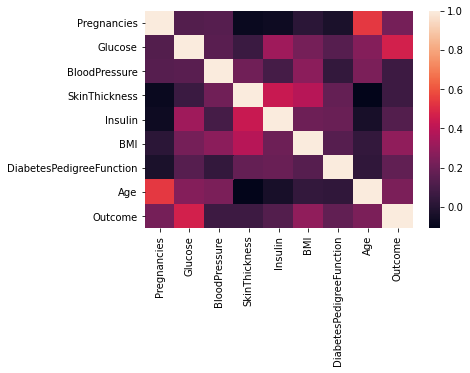

In [11]:
df.corr()
sns.heatmap(df.corr().round(2))

<AxesSubplot:>

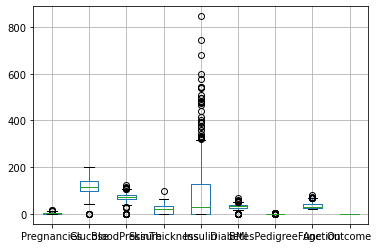

In [12]:
df.boxplot()

<AxesSubplot:ylabel='Age'>

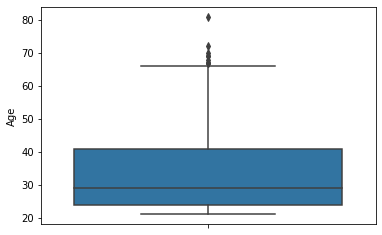

In [13]:
sns.boxplot(y='Age', data=df)

<AxesSubplot:ylabel='Insulin'>

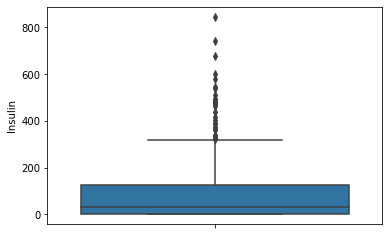

In [14]:
sns.boxplot(y='Insulin', data=df)

<AxesSubplot:ylabel='Pregnancies'>

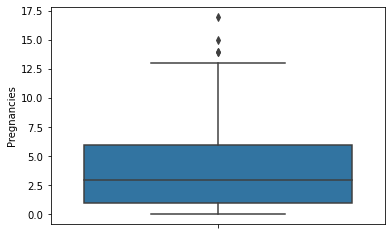

In [15]:
sns.boxplot(y='Pregnancies', data=df)

<AxesSubplot:ylabel='Outcome'>

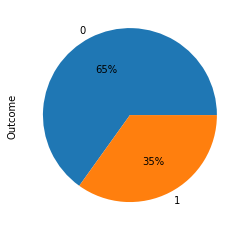

In [16]:
df['Outcome'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

In [17]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
scaler = MinMaxScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train

array([[0.41176471, 0.75757576, 0.63934426, ..., 0.52459016, 0.26216909,
        0.55      ],
       [0.23529412, 0.48989899, 0.49180328, ..., 0.42026826, 0.1558497 ,
        0.01666667],
       [0.        , 0.83333333, 0.73770492, ..., 0.77943368, 0.14901793,
        0.03333333],
       ...,
       [0.23529412, 0.47474747, 0.53278689, ..., 0.3681073 , 0.02988898,
        0.        ],
       [0.64705882, 0.42929293, 0.60655738, ..., 0.4485842 , 0.09479078,
        0.23333333],
       [0.29411765, 0.68686869, 0.67213115, ..., 0.        , 0.23996584,
        0.8       ]])

In [22]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = reg.predict(x_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



In [25]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


<AxesSubplot:>

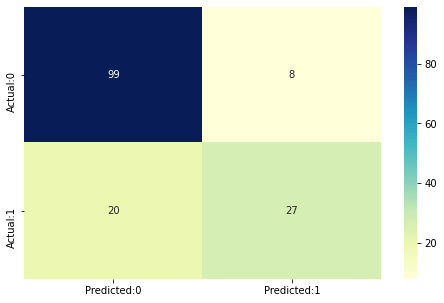

In [26]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [27]:
#Confusion Matrix for Logistic Regression
# TN = 99
# TP = 27
# FN = 8
# FP = 20

In [28]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred2 = knn.predict(x_test)

In [30]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.66      0.57      0.61        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



In [31]:
print(accuracy_score(y_test,y_pred2))

0.7792207792207793


<AxesSubplot:>

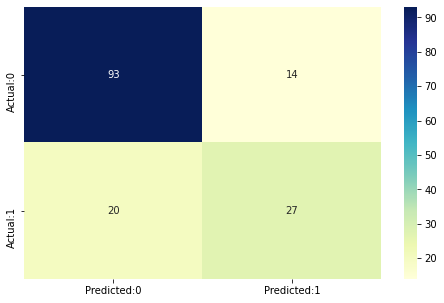

In [33]:
cm = confusion_matrix(y_test,y_pred2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [34]:
#Confusion matrix for K-Nearest Neighbours
# TN = 93
# TP = 27
# FN = 14
# FP = 20